In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualization


# Task 1. EDA

In [2]:
# Load the datasets
customers_df = pd.read_csv("Downloads/Customers.csv")
products_df = pd.read_csv("Downloads/Products.csv")
transactions_df = pd.read_csv("Downloads/Transactions.csv")

# Display the first few rows of each dataset
print("Customers Data:")
display(customers_df.head())

print("\nProducts Data:")
display(products_df.head())

print("\nTransactions Data:")
display(transactions_df.head())


Customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## Data Overview and Initial Exploration

### Display Basic Information


In [4]:
# Display basic information for each dataset
print("Customers DataFrame Info:")
customers_df.info()
print("\nProducts DataFrame Info:")
products_df.info()
print("\nTransactions DataFrame Info:")
transactions_df.info()


Customers DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Colum

### Display Summary Statistics

In [5]:
# Display summary statistics for each dataset
print("Customers DataFrame Summary Statistics:")
display(customers_df.describe(include='all'))

print("\nProducts DataFrame Summary Statistics:")
display(products_df.describe(include='all'))

print("\nTransactions DataFrame Summary Statistics:")
display(transactions_df.describe(include='all'))


Customers DataFrame Summary Statistics:


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3



Products DataFrame Summary Statistics:


,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000



Transactions DataFrame Summary Statistics:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


### Check for Missing Values

In [6]:
# Check for missing values in each dataset
print("Missing Values in Customers DataFrame:")
print(customers_df.isnull().sum())

print("\nMissing Values in Products DataFrame:")
print(products_df.isnull().sum())

print("\nMissing Values in Transactions DataFrame:")
print(transactions_df.isnull().sum())


Missing Values in Customers DataFrame:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products DataFrame:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions DataFrame:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Data Cleaning

### Handling Missing Values

#### Customers Dataset:

In [7]:
# Check for missing values
print("Missing Values in Customers DataFrame:")
print(customers_df.isnull().sum())

# If 'Region' has missing values, fill with 'Unknown'
if customers_df['Region'].isnull().sum() > 0:
    customers_df['Region'].fillna('Unknown', inplace=True)

# If 'SignupDate' has missing values, you might consider filling with a specific date or dropping those rows
# For this example, we'll drop rows with missing 'SignupDate'
customers_df.dropna(subset=['SignupDate'], inplace=True)


Missing Values in Customers DataFrame:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


#### Products Dataset:

In [8]:
# Check for missing values
print("Missing Values in Products DataFrame:")
print(products_df.isnull().sum())

# If 'Category' has missing values, fill with 'Miscellaneous'
if products_df['Category'].isnull().sum() > 0:
    products_df['Category'].fillna('Miscellaneous', inplace=True)

# If 'Price' has missing values, you might consider filling with the median price or dropping those rows
# For this example, we'll fill missing 'Price' with the median price
if products_df['Price'].isnull().sum() > 0:
    median_price = products_df['Price'].median()
    products_df['Price'].fillna(median_price, inplace=True)


Missing Values in Products DataFrame:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


#### Transactions Dataset:

In [9]:
# Check for missing values
print("Missing Values in Transactions DataFrame:")
print(transactions_df.isnull().sum())

# For missing 'Quantity' or 'TotalValue', you might need to drop those rows as they are crucial for analysis
transactions_df.dropna(subset=['Quantity', 'TotalValue'], inplace=True)

# If 'Price' has missing values, fill with the median price
if transactions_df['Price'].isnull().sum() > 0:
    median_transaction_price = transactions_df['Price'].median()
    transactions_df['Price'].fillna(median_transaction_price, inplace=True)


Missing Values in Transactions DataFrame:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


#### Correcting Data Types


In [10]:
# Convert 'SignupDate' and 'TransactionDate' to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Ensure 'Price', 'Quantity', and 'TotalValue' are floats
products_df['Price'] = products_df['Price'].astype(float)
transactions_df['Price'] = transactions_df['Price'].astype(float)
transactions_df['Quantity'] = transactions_df['Quantity'].astype(float)
transactions_df['TotalValue'] = transactions_df['TotalValue'].astype(float)


#### Removing Duplicates

In [11]:
# Remove duplicates in each DataFrame
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)


## Exploratory Data Analysis (EDA)

### 1.Customer Analysis

#### a. Customer Distribution by Region

C:\Users\morey\AppData\Local\Temp\ipykernel_15064\600263938.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


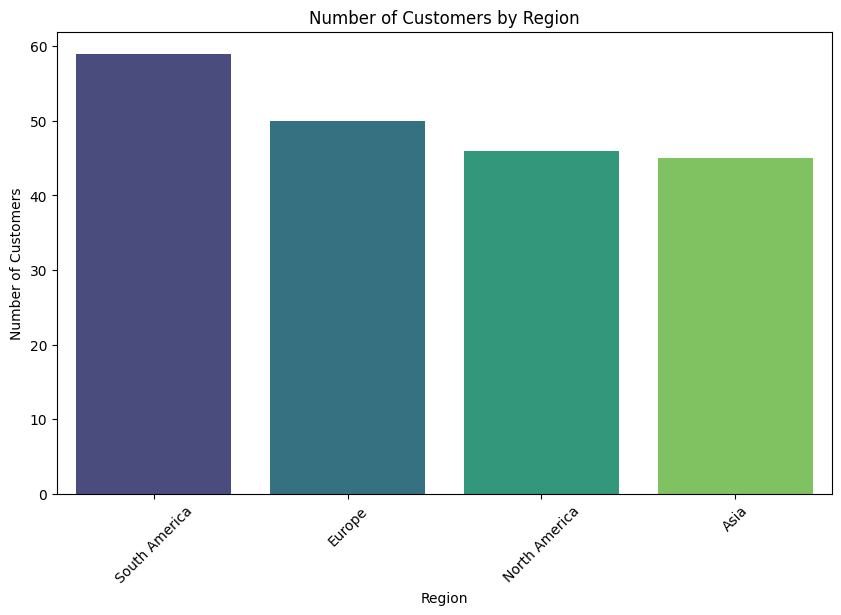

In [12]:
# Count of customers per region
region_counts = customers_df['Region'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


#### b. Customer Sign-Up Trend Over Time

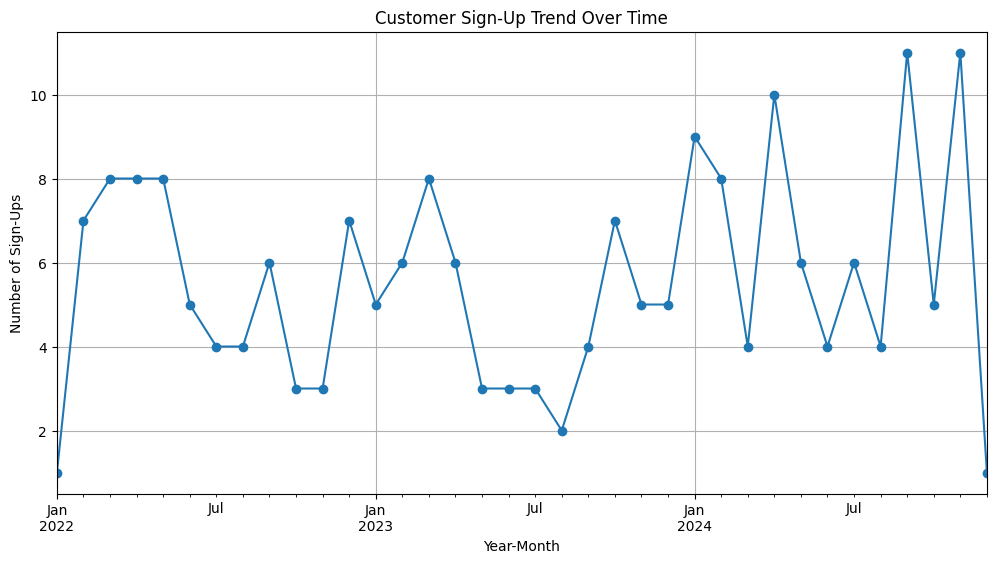

In [13]:
# Extract year and month from SignupDate
customers_df['SignupYearMonth'] = customers_df['SignupDate'].dt.to_period('M')

# Count of sign-ups per month
signup_trends = customers_df['SignupYearMonth'].value_counts().sort_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o')
plt.title('Customer Sign-Up Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sign-Ups')
plt.grid(True)
plt.show()


### 2. Product Analysis

#### a. Product Category Distribution

C:\Users\morey\AppData\Local\Temp\ipykernel_15064\33219473.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='muted')


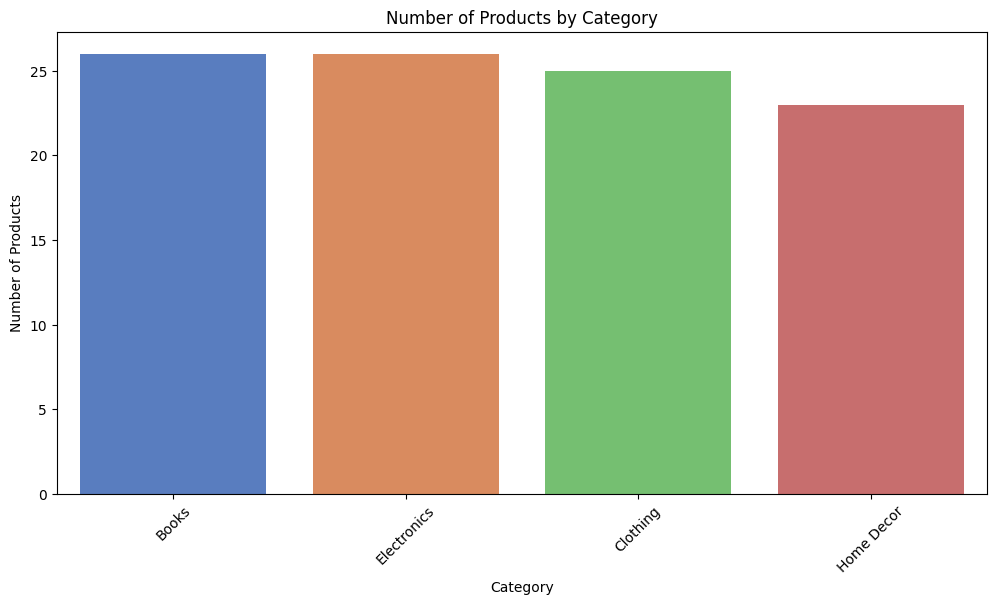

In [14]:
# Count of products per category
category_counts = products_df['Category'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='muted')
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


#### b. Price Distribution of Products

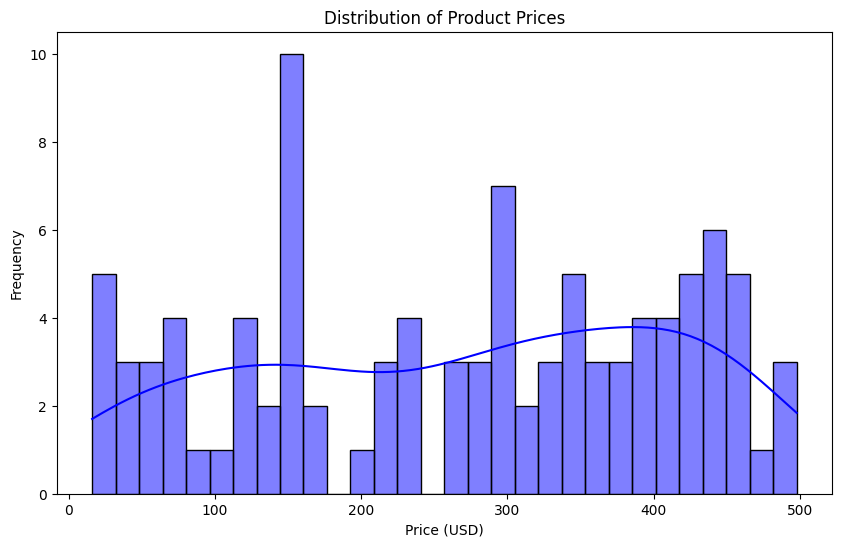

In [15]:
# Plotting the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


### 3. Transaction Analysis


#### a. Sales Trend Over Time

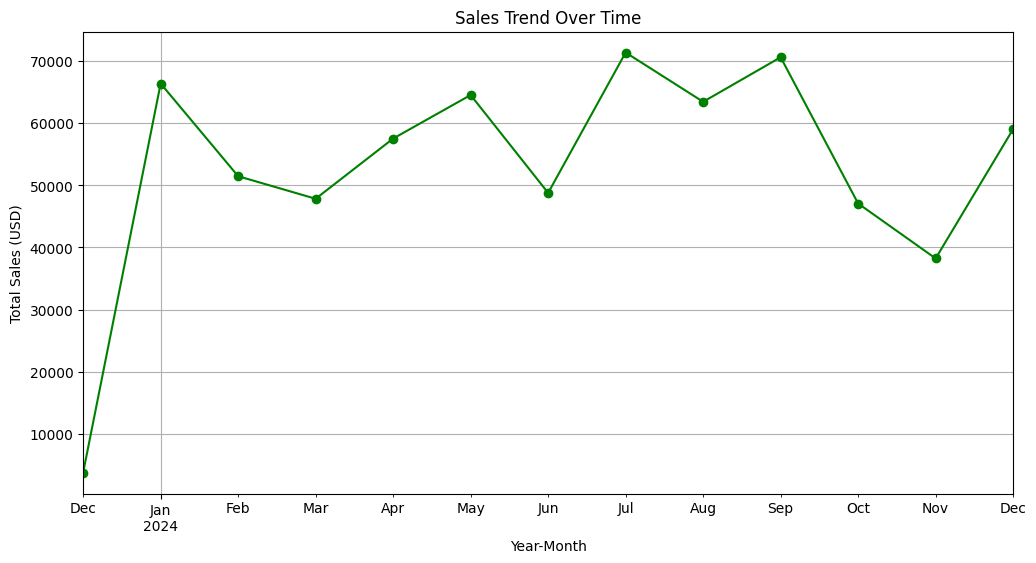

In [16]:
# Extract year and month from TransactionDate
transactions_df['TransactionYearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')

# Sum of TotalValue per month
sales_trends = transactions_df.groupby('TransactionYearMonth')['TotalValue'].sum()

# Plotting the sales trend
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='line', marker='o', color='green')
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()


#### b. Top 10 Products by Sales

C:\Users\morey\AppData\Local\Temp\ipykernel_15064\641338924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='coolwarm')


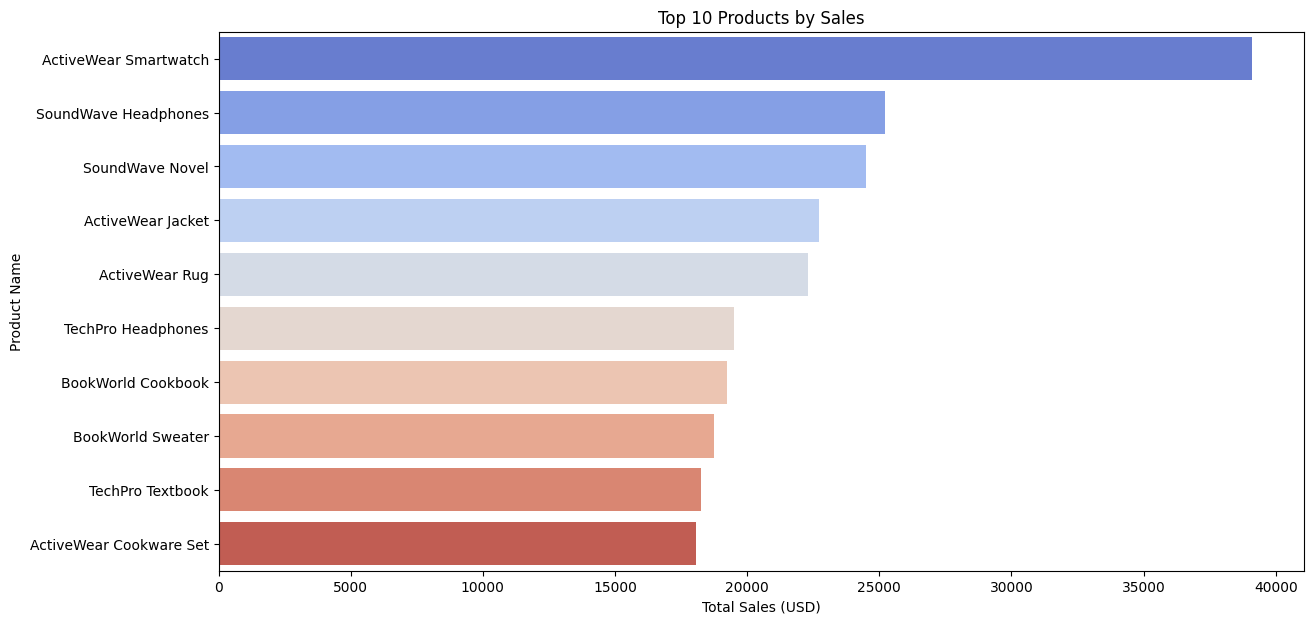

In [17]:
# Merging transactions with products to get product names
merged_df = transactions_df.merge(products_df, on='ProductID')

# Calculating total sales per product
product_sales = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 products by sales
plt.figure(figsize=(14, 7))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='coolwarm')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()


#### c. Average Order Value (AOV)

In [18]:
# Calculating AOV
aov = transactions_df['TotalValue'].mean()
print(f"The Average Order Value (AOV) is: ${aov:.2f}")


The Average Order Value (AOV) is: $690.00


### 4. Customer Segmentation Based on Purchase Behavior

C:\Users\morey\AppData\Local\Temp\ipykernel_15064\3404711132.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='TotalValue', data=customer_spending, palette='Set2')


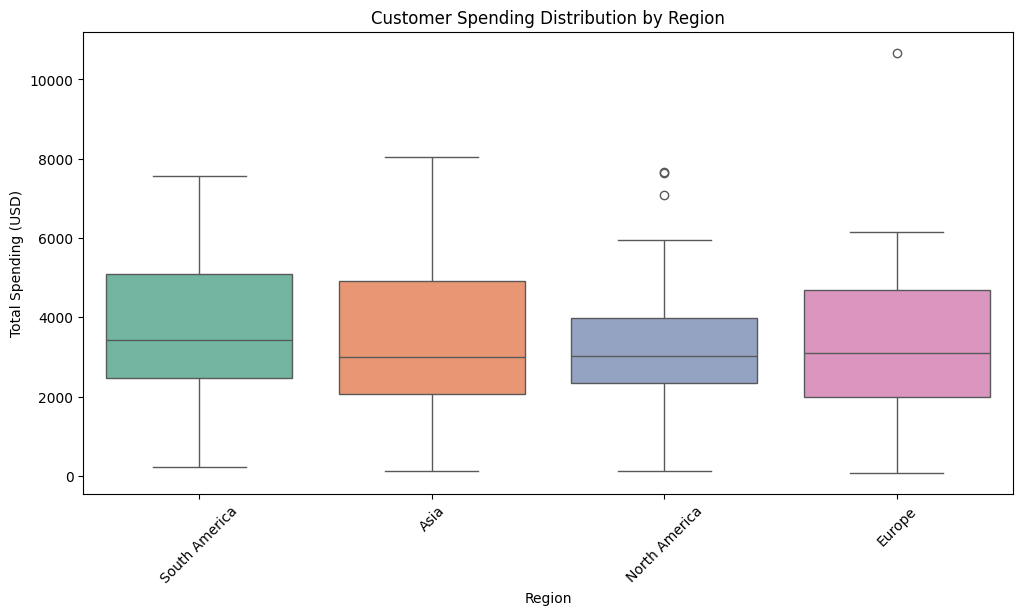

In [19]:
# Calculating total spending per customer
customer_spending = transactions_df.groupby('CustomerID')['TotalValue'].sum()

# Merging with customer data to get regions
customer_spending = customer_spending.reset_index().merge(customers_df, on='CustomerID')

# Plotting spending distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='TotalValue', data=customer_spending, palette='Set2')
plt.title('Customer Spending Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()


## Customer Segmentation

### 1. Data Preparation

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'TransactionDate' is in datetime format
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Calculate Recency, Frequency, and Monetary (RFM) metrics
# Recency: Days since last purchase
# Frequency: Number of purchases
# Monetary: Total amount spent

# Calculate the latest transaction date
latest_date = transactions_df['TransactionDate'].max()

# Calculate RFM metrics for each customer
rfm = transactions_df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (latest_date - x.max()).days,
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TotalValue': 'Monetary'
}).reset_index()

# Merge with customer data to include demographic information
rfm = rfm.merge(customers_df, on='CustomerID')

# Display the first few rows of the RFM dataframe
rfm.head()


,CustomerID,Recency,Frequency,Monetary,CustomerName,Region,SignupDate,SignupYearMonth
0,C0001,55,5,3354.52,Lawrence Carroll,South America,2022-07-10,2022-07
1,C0002,25,4,1862.74,Elizabeth Lutz,Asia,2022-02-13,2022-02
2,C0003,125,4,2725.38,Michael Rivera,South America,2024-03-07,2024-03
3,C0004,4,8,5354.88,Kathleen Rodriguez,South America,2022-10-09,2022-10
4,C0005,54,3,2034.24,Laura Weber,Asia,2022-08-15,2022-08


### 2. Data Standardization

In [21]:
# Select RFM features
features = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


### 3. Determine Optimal Number of Clusters

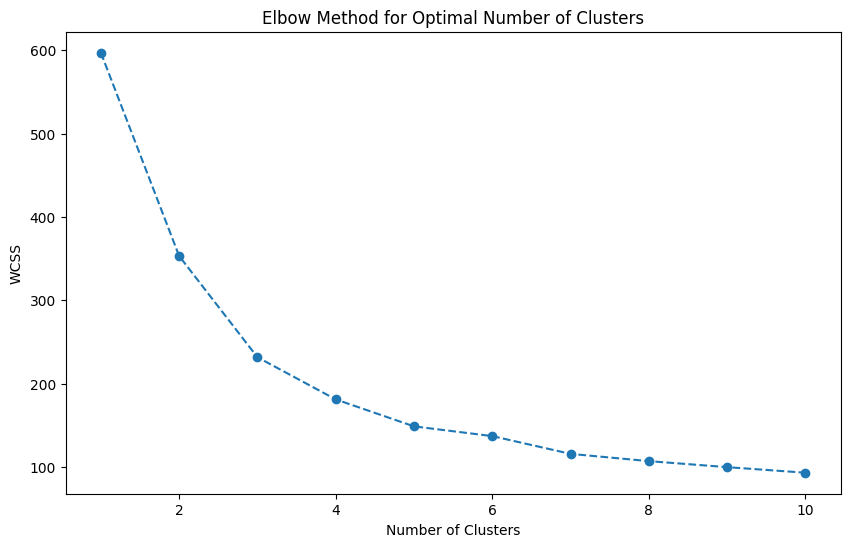

In [22]:
# Calculate Within-Cluster Sum of Squares (WCSS) for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


### 4. Apply K-Means Clustering

In [23]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows of the RFM dataframe with cluster labels
rfm.head()


,CustomerID,Recency,Frequency,Monetary,CustomerName,Region,SignupDate,SignupYearMonth,Cluster
0,C0001,55,5,3354.52,Lawrence Carroll,South America,2022-07-10,2022-07,3
1,C0002,25,4,1862.74,Elizabeth Lutz,Asia,2022-02-13,2022-02,1
2,C0003,125,4,2725.38,Michael Rivera,South America,2024-03-07,2024-03,1
3,C0004,4,8,5354.88,Kathleen Rodriguez,South America,2022-10-09,2022-10,0
4,C0005,54,3,2034.24,Laura Weber,Asia,2022-08-15,2022-08,1


### 5. Analyze and Interpret Clusters

In [24]:
# Calculate mean RFM values and customer count for each cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'CustomerCount'}).reset_index()

# Display the cluster summary
cluster_summary


,Cluster,Recency,Frequency,Monetary,CustomerCount
0,0,34.736842,8.236842,5958.357895,38
1,1,50.675325,3.714286,2176.816883,77
2,2,243.823529,1.764706,1070.562353,17
3,3,79.656716,5.537313,4145.723881,67


### 6. Visualize Clusters

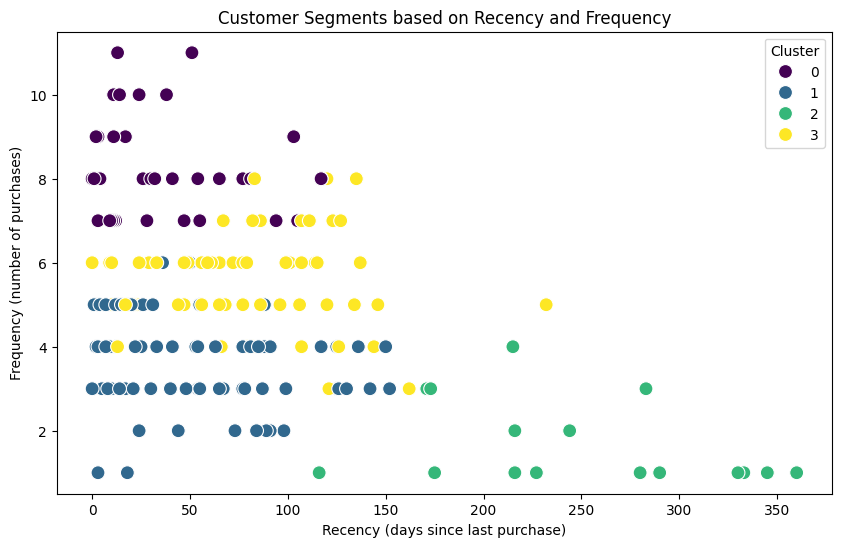

In [25]:
# Plot clusters based on Recency and Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on Recency and Frequency')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.legend(title='Cluster')
plt.show()
